In [1]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests


/Users/sriramlakkaraju/Desktop/github/AI-LLM-Focus/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load Model & Processor

In [2]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [3]:
texts = [
    "a photo of a cat",
    "an image of a dog",
    "a drawing of a cat",
    "a picture of a daisy"
]

inputs = processor(text=texts, return_tensors="pt", padding=True)
with torch.no_grad():
    text_embeds = model.get_text_features(**inputs)

# Normalize
text_embeds = text_embeds / text_embeds.norm(dim=-1, keepdim=True)

# Cosine similarity
sims = text_embeds @ text_embeds.T
sims.numpy()


array([[0.9999997 , 0.91556656, 0.9076987 , 0.80206835],
       [0.91556656, 1.        , 0.8452573 , 0.828084  ],
       [0.9076987 , 0.8452573 , 0.99999994, 0.7435326 ],
       [0.80206835, 0.828084  , 0.7435326 , 1.0000001 ]], dtype=float32)

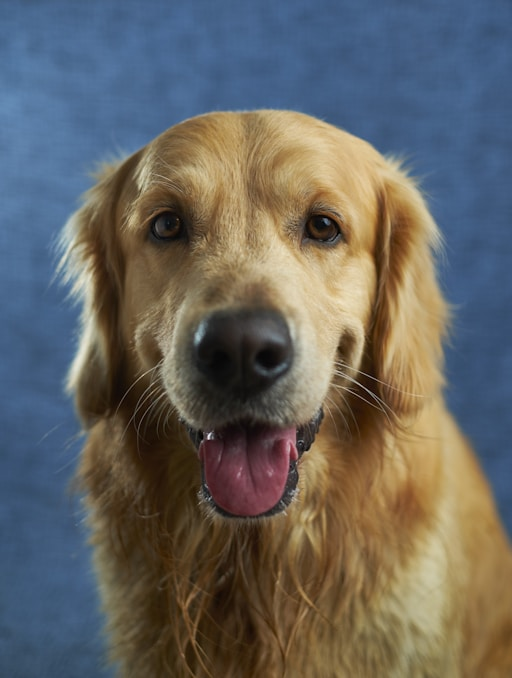

In [4]:
import requests
from PIL import Image
from io import BytesIO

url = "https://images.unsplash.com/photo-1558788353-f76d92427f16?w=512"
response = requests.get(url, stream=True)
response.raise_for_status()

image = Image.open(BytesIO(response.content)).convert("RGB")

# ✅ This will display inline in Jupyter
image


In [5]:
texts = ["a photo of a dog", "a photo of a cat", "chair"]

inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)

with torch.no_grad():
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)

print("Texts:", texts)
print("Probabilities:", probs.numpy())


Texts: ['a photo of a dog', 'a photo of a cat', 'chair']
Probabilities: [[9.9960250e-01 3.3162936e-04 6.5903041e-05]]
